In [6]:
name = "Ha Hung Thinh"
id = 2419437

In [17]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [8]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [11]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [18]:
# Print the list of files in the ./data directory
#os.listdir('./data')   

In [19]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']

# Testing with only 200 sample
#IMPORTANT !!! remove when submit
#IMPORTANT !!! remove when submit
fs = 125        # Sample rate (Hz), samples per second
ts = 1/fs       # Sample time in seconds
t = np.arange(len(ppg))*ts

FileNotFoundError: [Errno 2] No such file or directory: './data/bidmc_06_Signals.csv'

In [1]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, ts * len(ppg))
plt.grid()
plt.show()

NameError: name 'plt' is not defined

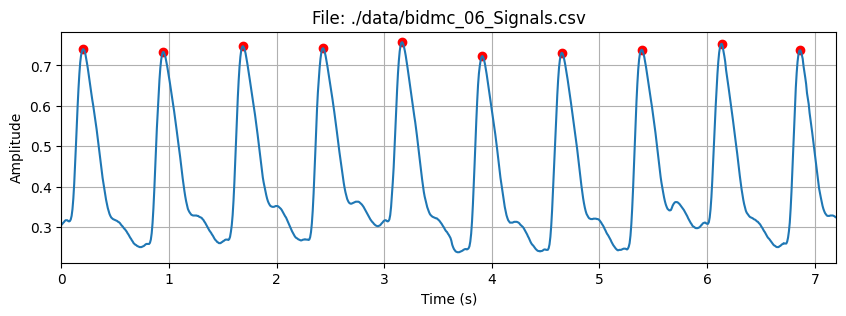

In [23]:
#using find peak method to get the list of peak from ppg data
peaks_time, peaks_height = find_peaks(ppg, height=0.5)
peaks_height = peaks_height['peak_heights'] #extract the peak amplitude from the tuple
peaks_time = peaks_time * ts    #convert the list of peaks time in order number to actual time by multiply with time period

#plot the ppg data with the peak
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.scatter(peaks_time,peaks_height,color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, ts * len(ppg))
plt.grid()
plt.show()

In [24]:
#peak to peak interval list, pre-calculate all peak to peak interval and put them into a list
#Amount of PPI is equal to amount of peaks - 1
PPIList = []
for i in range(len(peaks_time) - 1):
    PPIList.append(peaks_time[i+1]- peaks_time[i])


[np.float64(0.744), np.float64(0.7439999999999999), np.float64(0.744), np.float64(0.7360000000000002), np.float64(0.7439999999999998), np.float64(0.7359999999999998), np.float64(0.7440000000000007), np.float64(0.7439999999999998), np.float64(0.7279999999999998)]


In [25]:
#the average of peak to peak interval or mean PPI
meanPPI = sum(PPIList)/len(PPIList)
print("Mean PPI in ms",  meanPPI*1000)

Mean PPI in ms 740.4444444444445


In [27]:
#average of heart rate or mean HR
meanHR = 60 / meanPPI
print("Mean heart rate in BPM", meanHR)


Mean heart rate in BPM 81.03241296518607


NameError: name 'PPIList' is not defined

Root mean square of successive differences in ms 8.000000000000036
